In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder

.SUPPORT VECTOR MACHINE
.Dataset Selection:
For this assignment, we'll utilize the widely recognized Mushroom Dataset
Task 1: Exploratory Data Analysis (EDA)
1.	Load the Mushroom dataset and perform fundamental data exploration.
2.	Utilize histograms, box plots, or density plots to understand feature distributions.
3.	Investigate feature correlations to discern relationships within the data.
Task 2: Data Preprocessing
1.	Encode categorical variables if necessary.
2.	Split the dataset into training and testing sets.
Task 3: Data Visualization
1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.
2.	Visualize class distributions to gauge dataset balance or imbalance.
Task 4: SVM Implementation
1.	Implement a basic SVM classifier using Python libraries like scikit-learn.
2.	Train the SVM model on the training data.
3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).
Task 5: Visualization of SVM Results
1.	Visualize classification results on the testing data.
Task 6: Parameter Tuning and Optimization
1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.
Task 7: Comparison and Analysis
1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).
2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.
3.	Discuss practical implications of SVM in real-world classification tasks.



In [22]:
df=pd.read_csv(r"C:\Users\durwa\Downloads\svm data.csv")
df

Unnamed: 0 cap_shape cap_surface cap_color bruises     odor  \
0           1167    sunken       scaly     white      no    anise   
1           1037    sunken     fibrous       red      no    anise   
2            309      flat     grooves    purple     yes     foul   
3            282      bell       scaly      pink     yes    fishy   
4            820      flat      smooth    yellow     yes    musty   
...          ...       ...         ...       ...     ...      ...   
1995         863    sunken       scaly     brown     yes     foul   
1996        1160    sunken       scaly    purple     yes    musty   
1997         265    convex     grooves     green     yes    fishy   
1998         411      bell      smooth     white      no  pungent   
1999        1073    convex       scaly    yellow     yes  pungent   

     gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
0         descending      distant     broad       pink  ...    partial   
1            notched      crowded    narrow  chocolate  ...  universal   
2         descending      crowded     broad     purple  ...  universal   
3            notched        close     broad     orange  ...    partial   
4               free      crowded    narrow     orange  ...  universal   
...              ...          ...       ...        ...  ...        ...   
1995        attached      crowded    narrow  chocolate  ...    partial   
1996        attached      distant    narrow        red  ...    partial   
1997         notched        close    narrow       pink  ...    partial   
1998            free        close    narrow     orange  ...  universal   
1999      descending        close    narrow     purple  ...    partial   

     veil_color ring_number   ring_type spore_print_color population  habitat  \
0         brown         two   sheathing         chocolate  clustered    waste   
1         brown         two   sheathing             brown   numerous    waste   
2        yellow         two   sheathing            purple   abundant    waste   
3        yellow         two    cobwebby             green  clustered  grasses   
4         white        none        none            yellow  clustered    urban   
...         ...         ...         ...               ...        ...      ...   
1995     orange         one     flaring            purple   abundant   leaves   
1996      white         one        zone            yellow   numerous    waste   
1997      brown         two  evanescent            yellow   abundant    woods   
1998     yellow         one    cobwebby             brown   solitary    woods   
1999      white         two       large             white   numerous    urban   

          class stalk_height cap_diameter  
0     poisonous    14.276173     5.054983  
1        edible     3.952715    19.068319  
2     poisonous     9.054265     7.205884  
3     poisonous     5.226499    20.932692  
4     poisonous    14.037532    12.545245  
...         ...          ...          ...  
1995  poisonous     5.877891    17.464145  
1996  poisonous     6.500840    13.501957  
1997  poisonous    13.558064    11.270020  
1998  poisonous    11.092703     8.423199  
1999  poisonous    13.066414    21.056642  

[2000 rows x 26 columns]

In [23]:
df.describe()

Unnamed: 0  stalk_height  cap_diameter
count  2000.000000   2000.000000   2000.000000
mean    624.974000      8.449118     12.314345
std     375.091938      3.697217      7.048845
min       0.000000      2.000000      1.000000
25%     290.000000      5.291009      5.723521
50%     607.000000      8.318596     12.124902
75%     957.250000     11.781272     18.698606
max    1279.000000     15.095066     25.000054

In [24]:
df.isna().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

<Axes: >

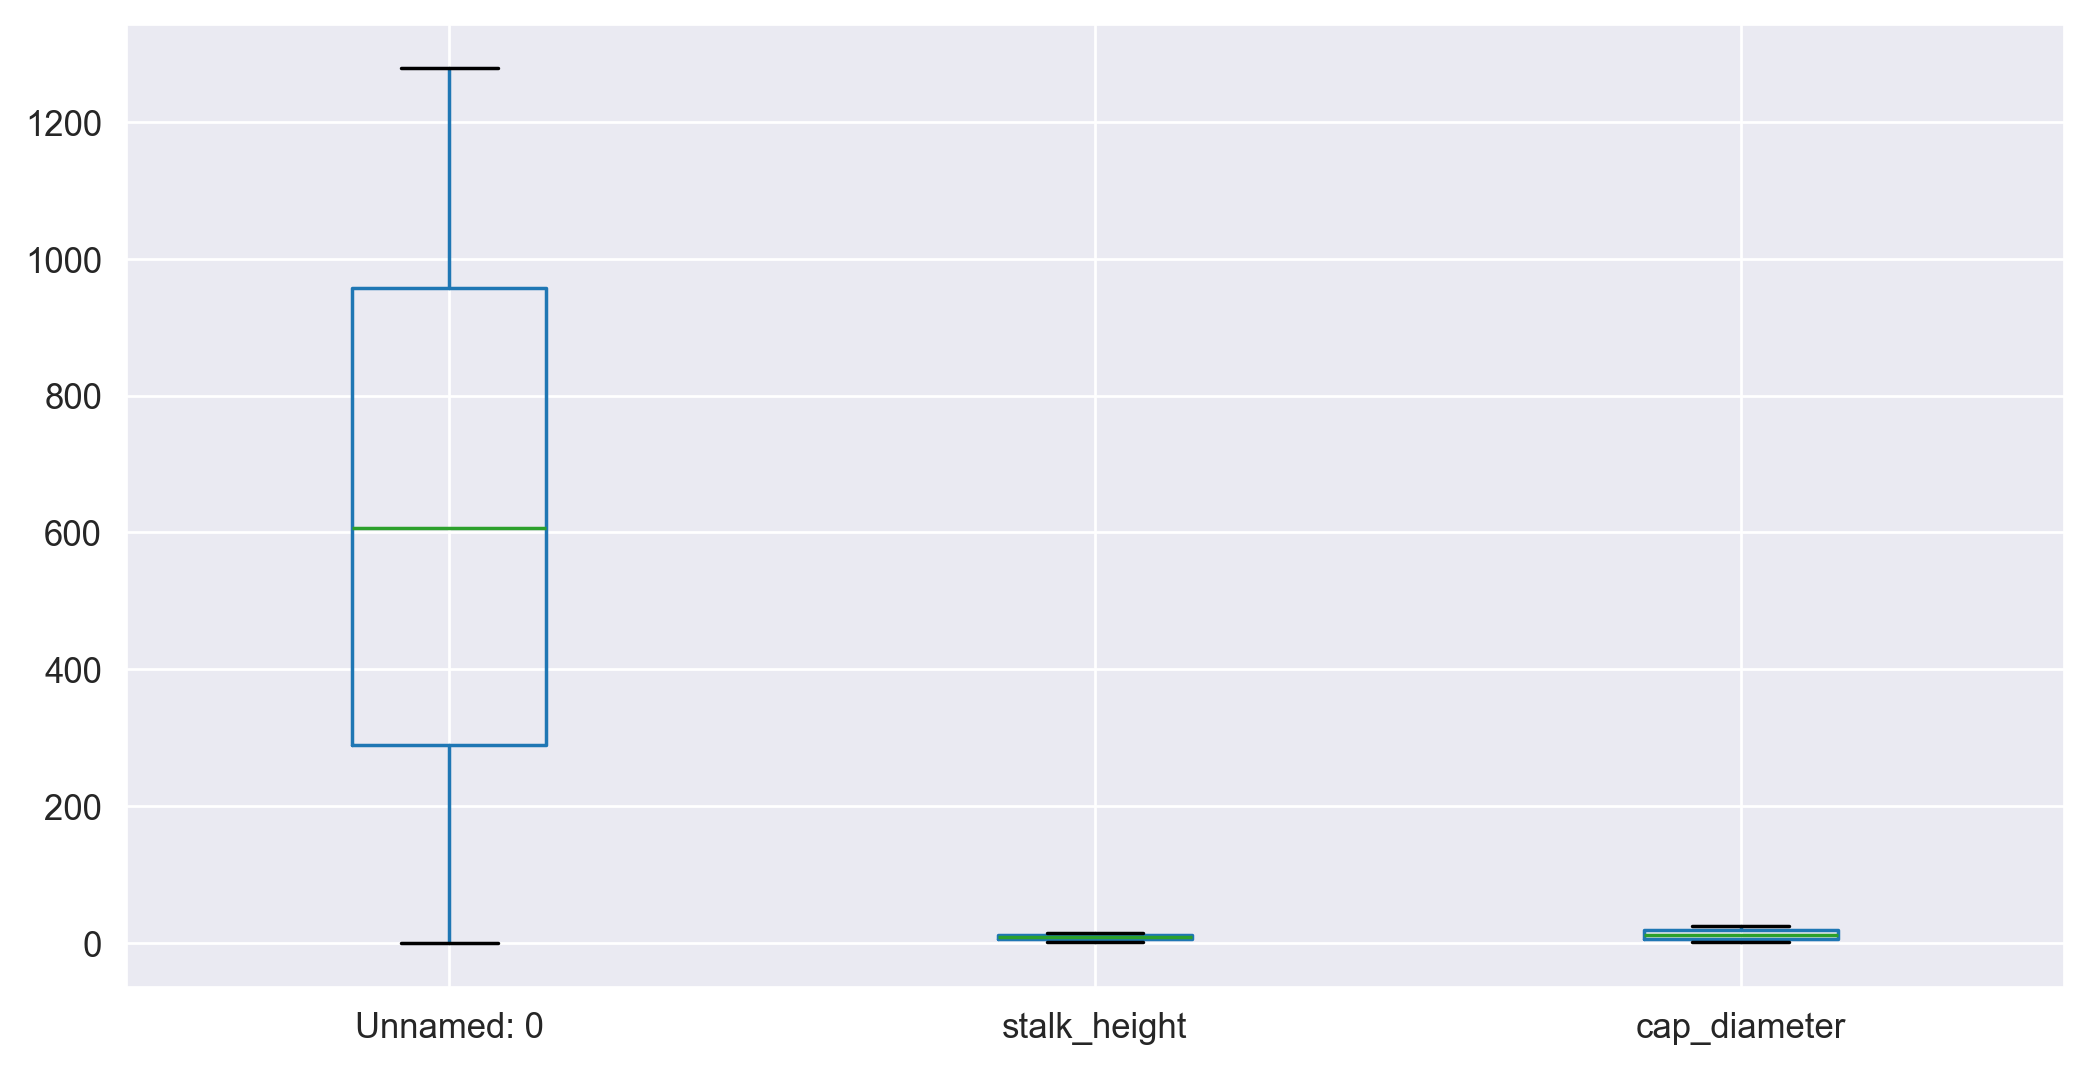

In [25]:
df.boxplot()

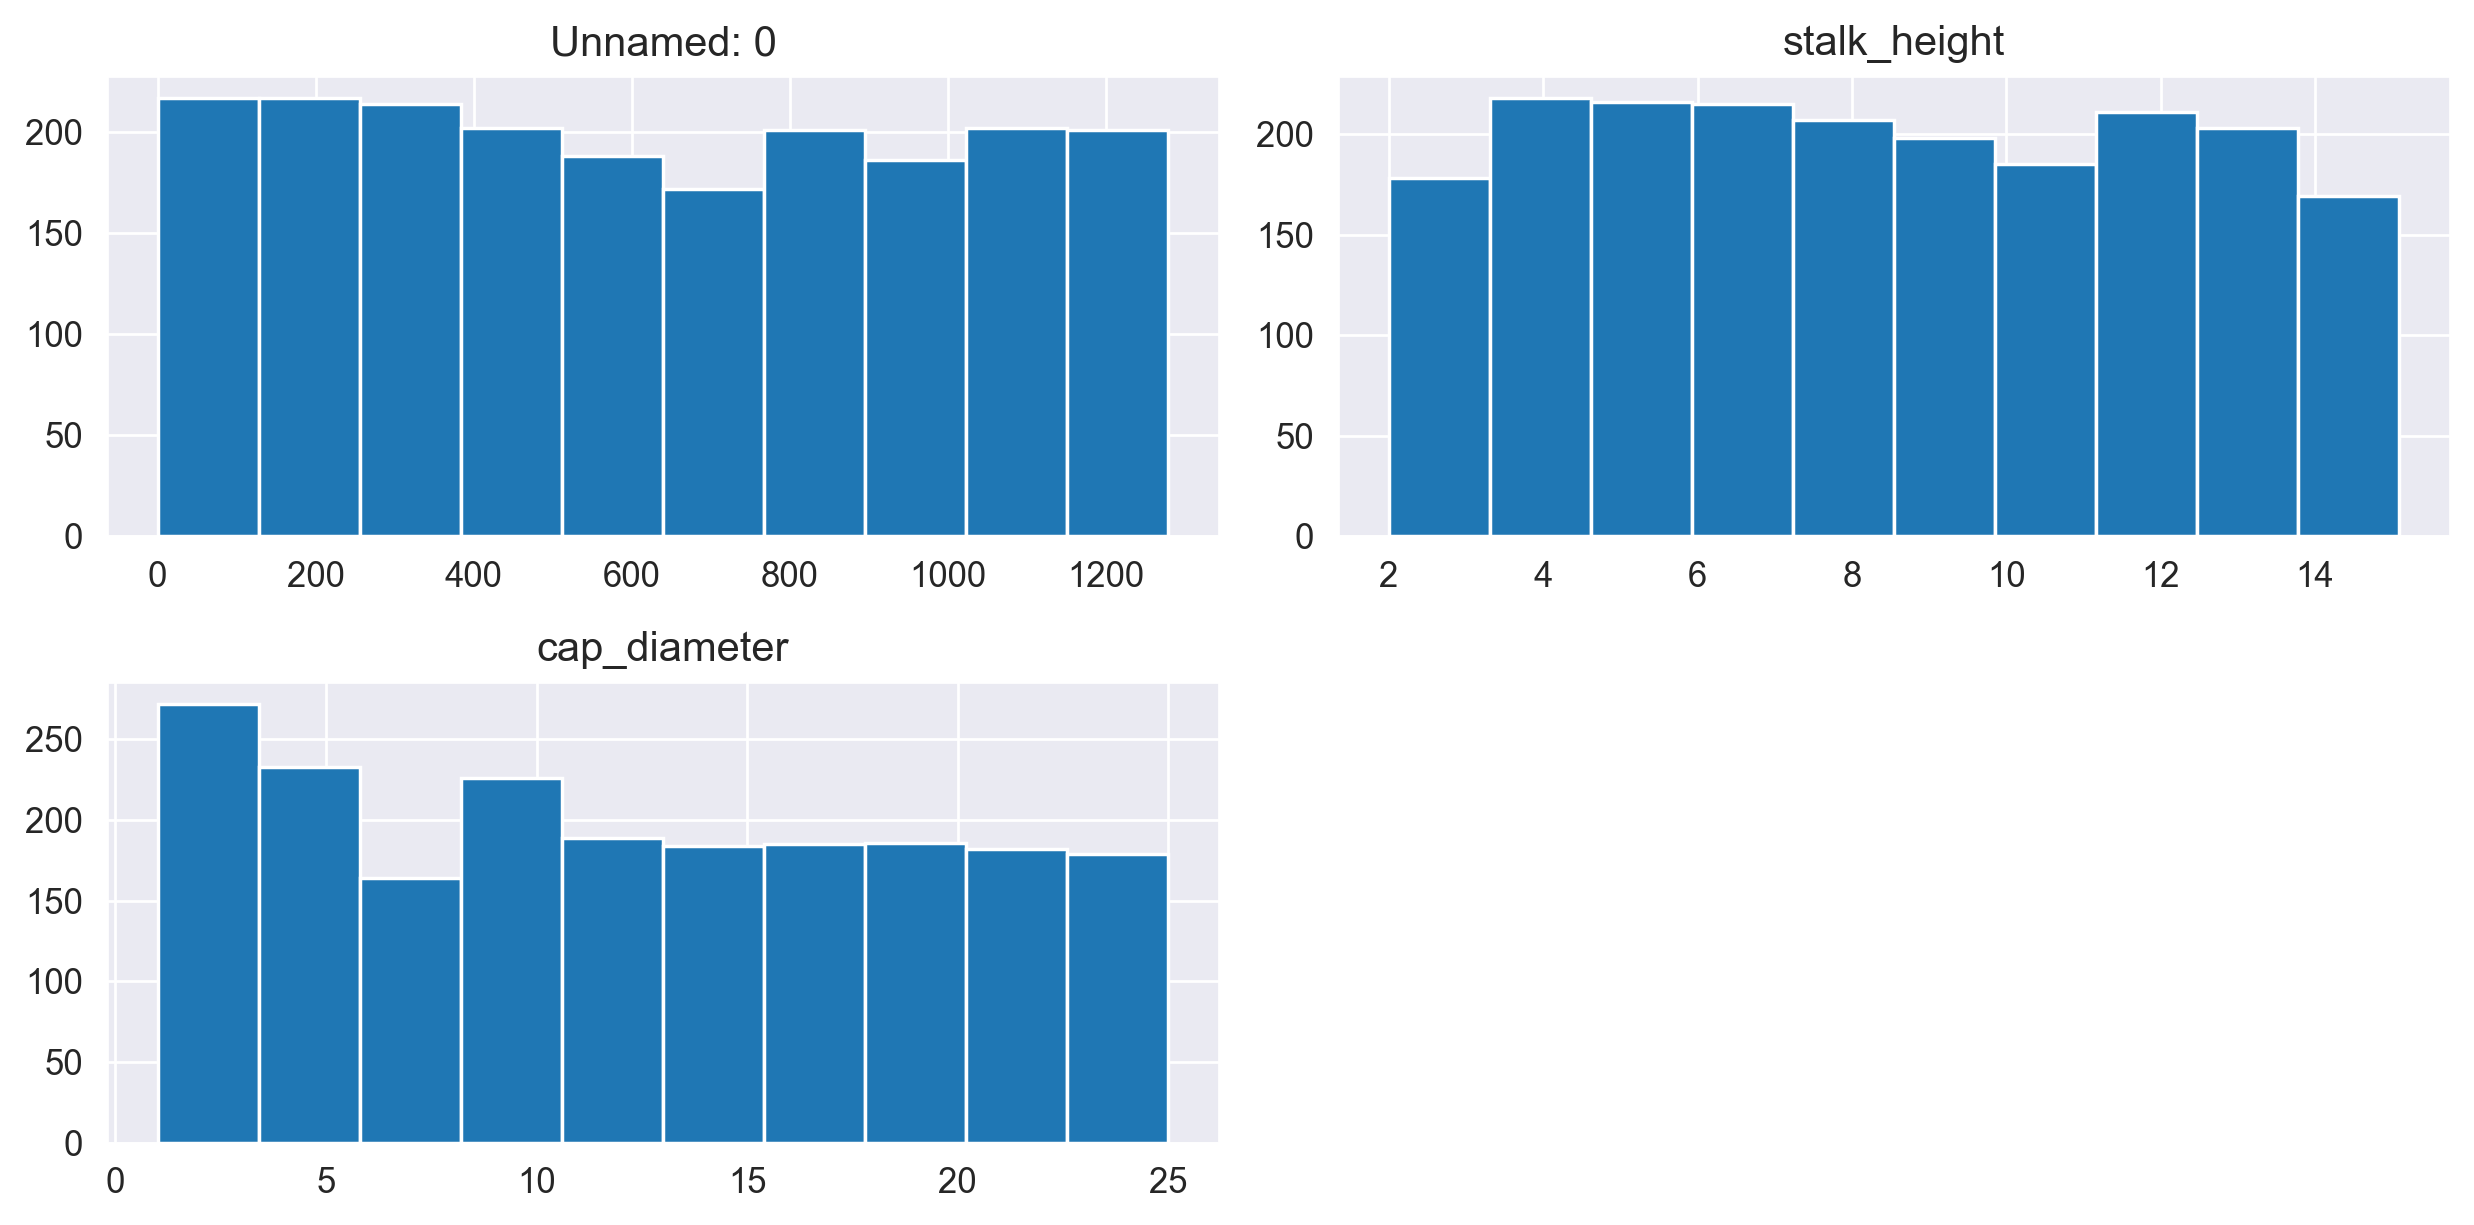

In [26]:
df.hist()
plt.tight_layout()

In [27]:
df.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

<Axes: xlabel='stalk_height', ylabel='cap_diameter'>

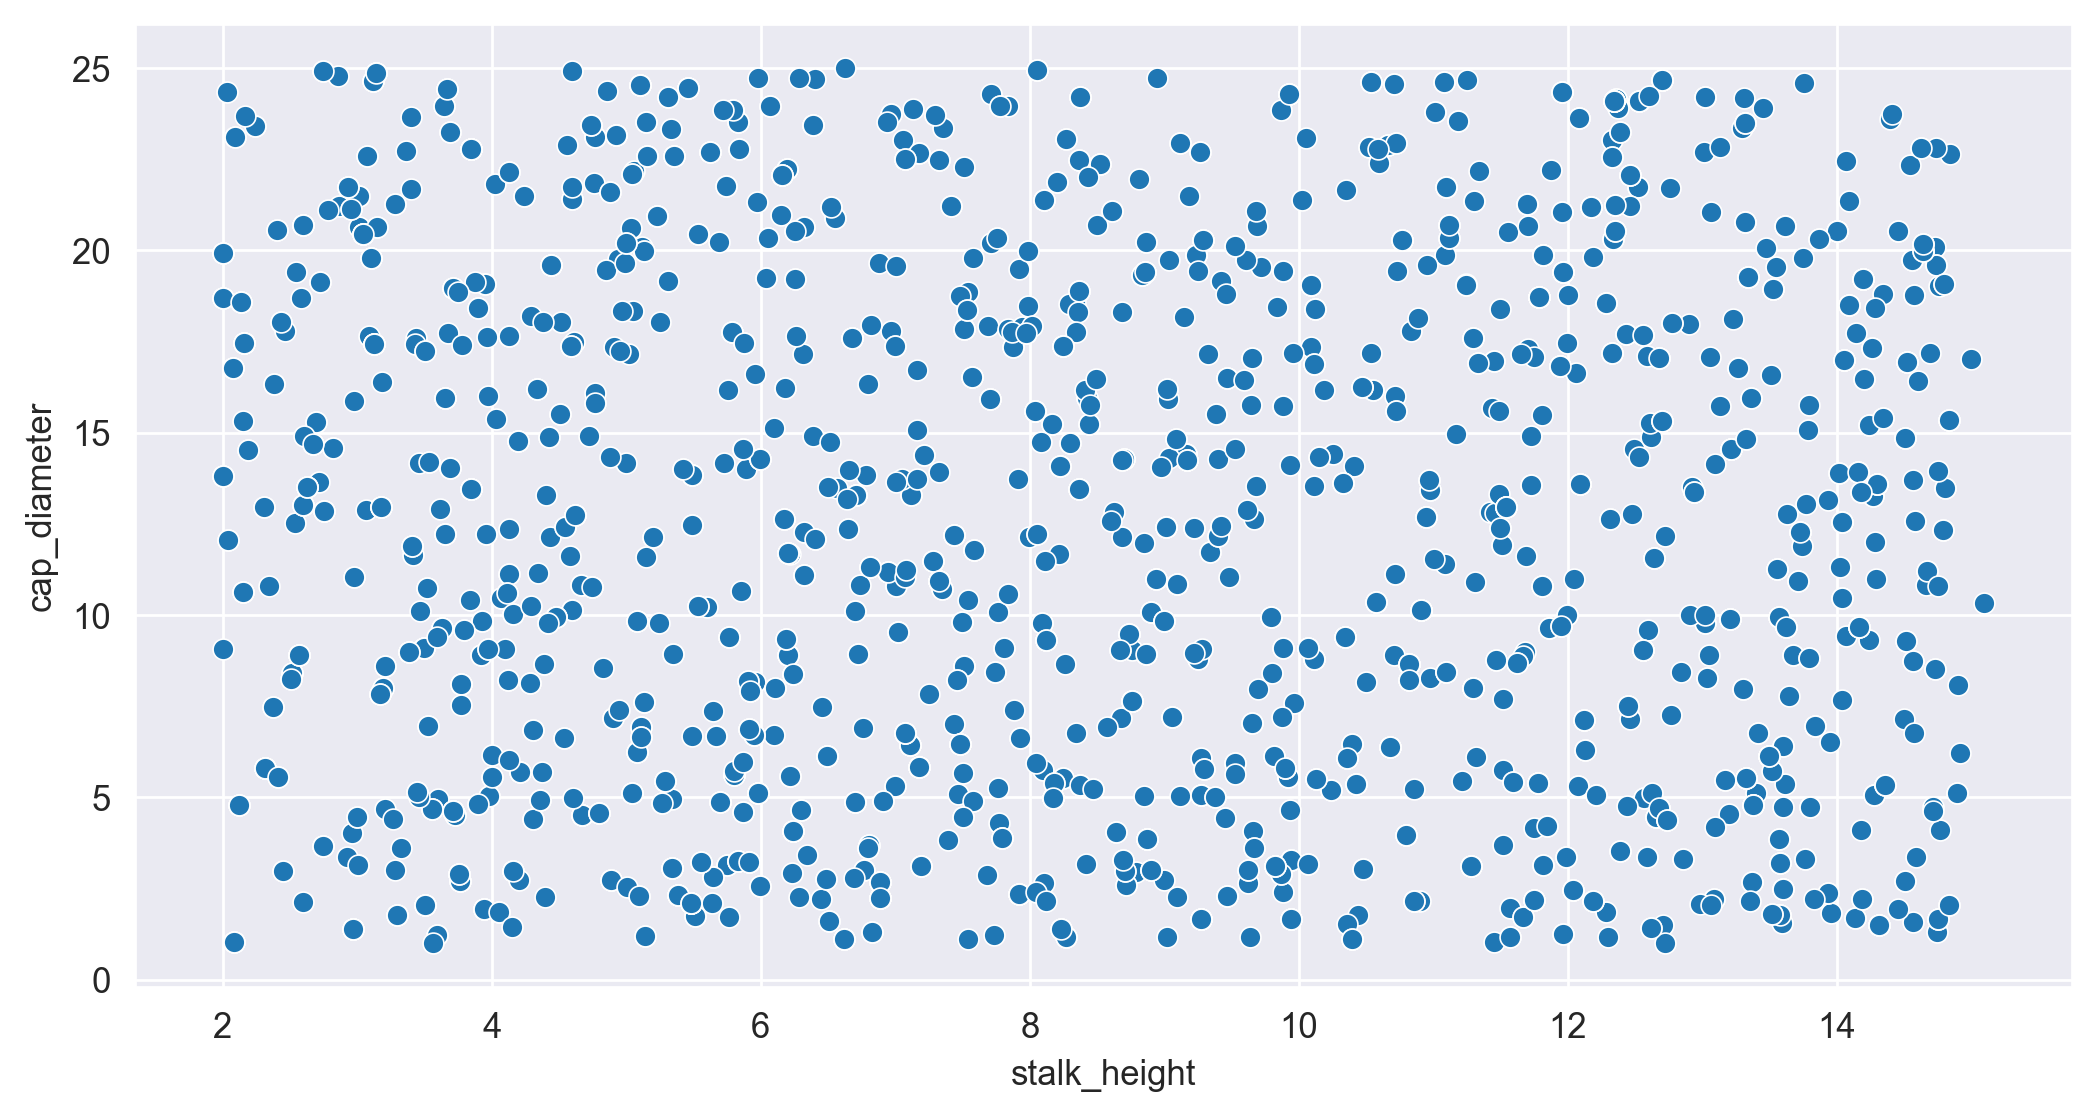

In [28]:
sns.scatterplot(x = df['stalk_height'],y = df['cap_diameter'])

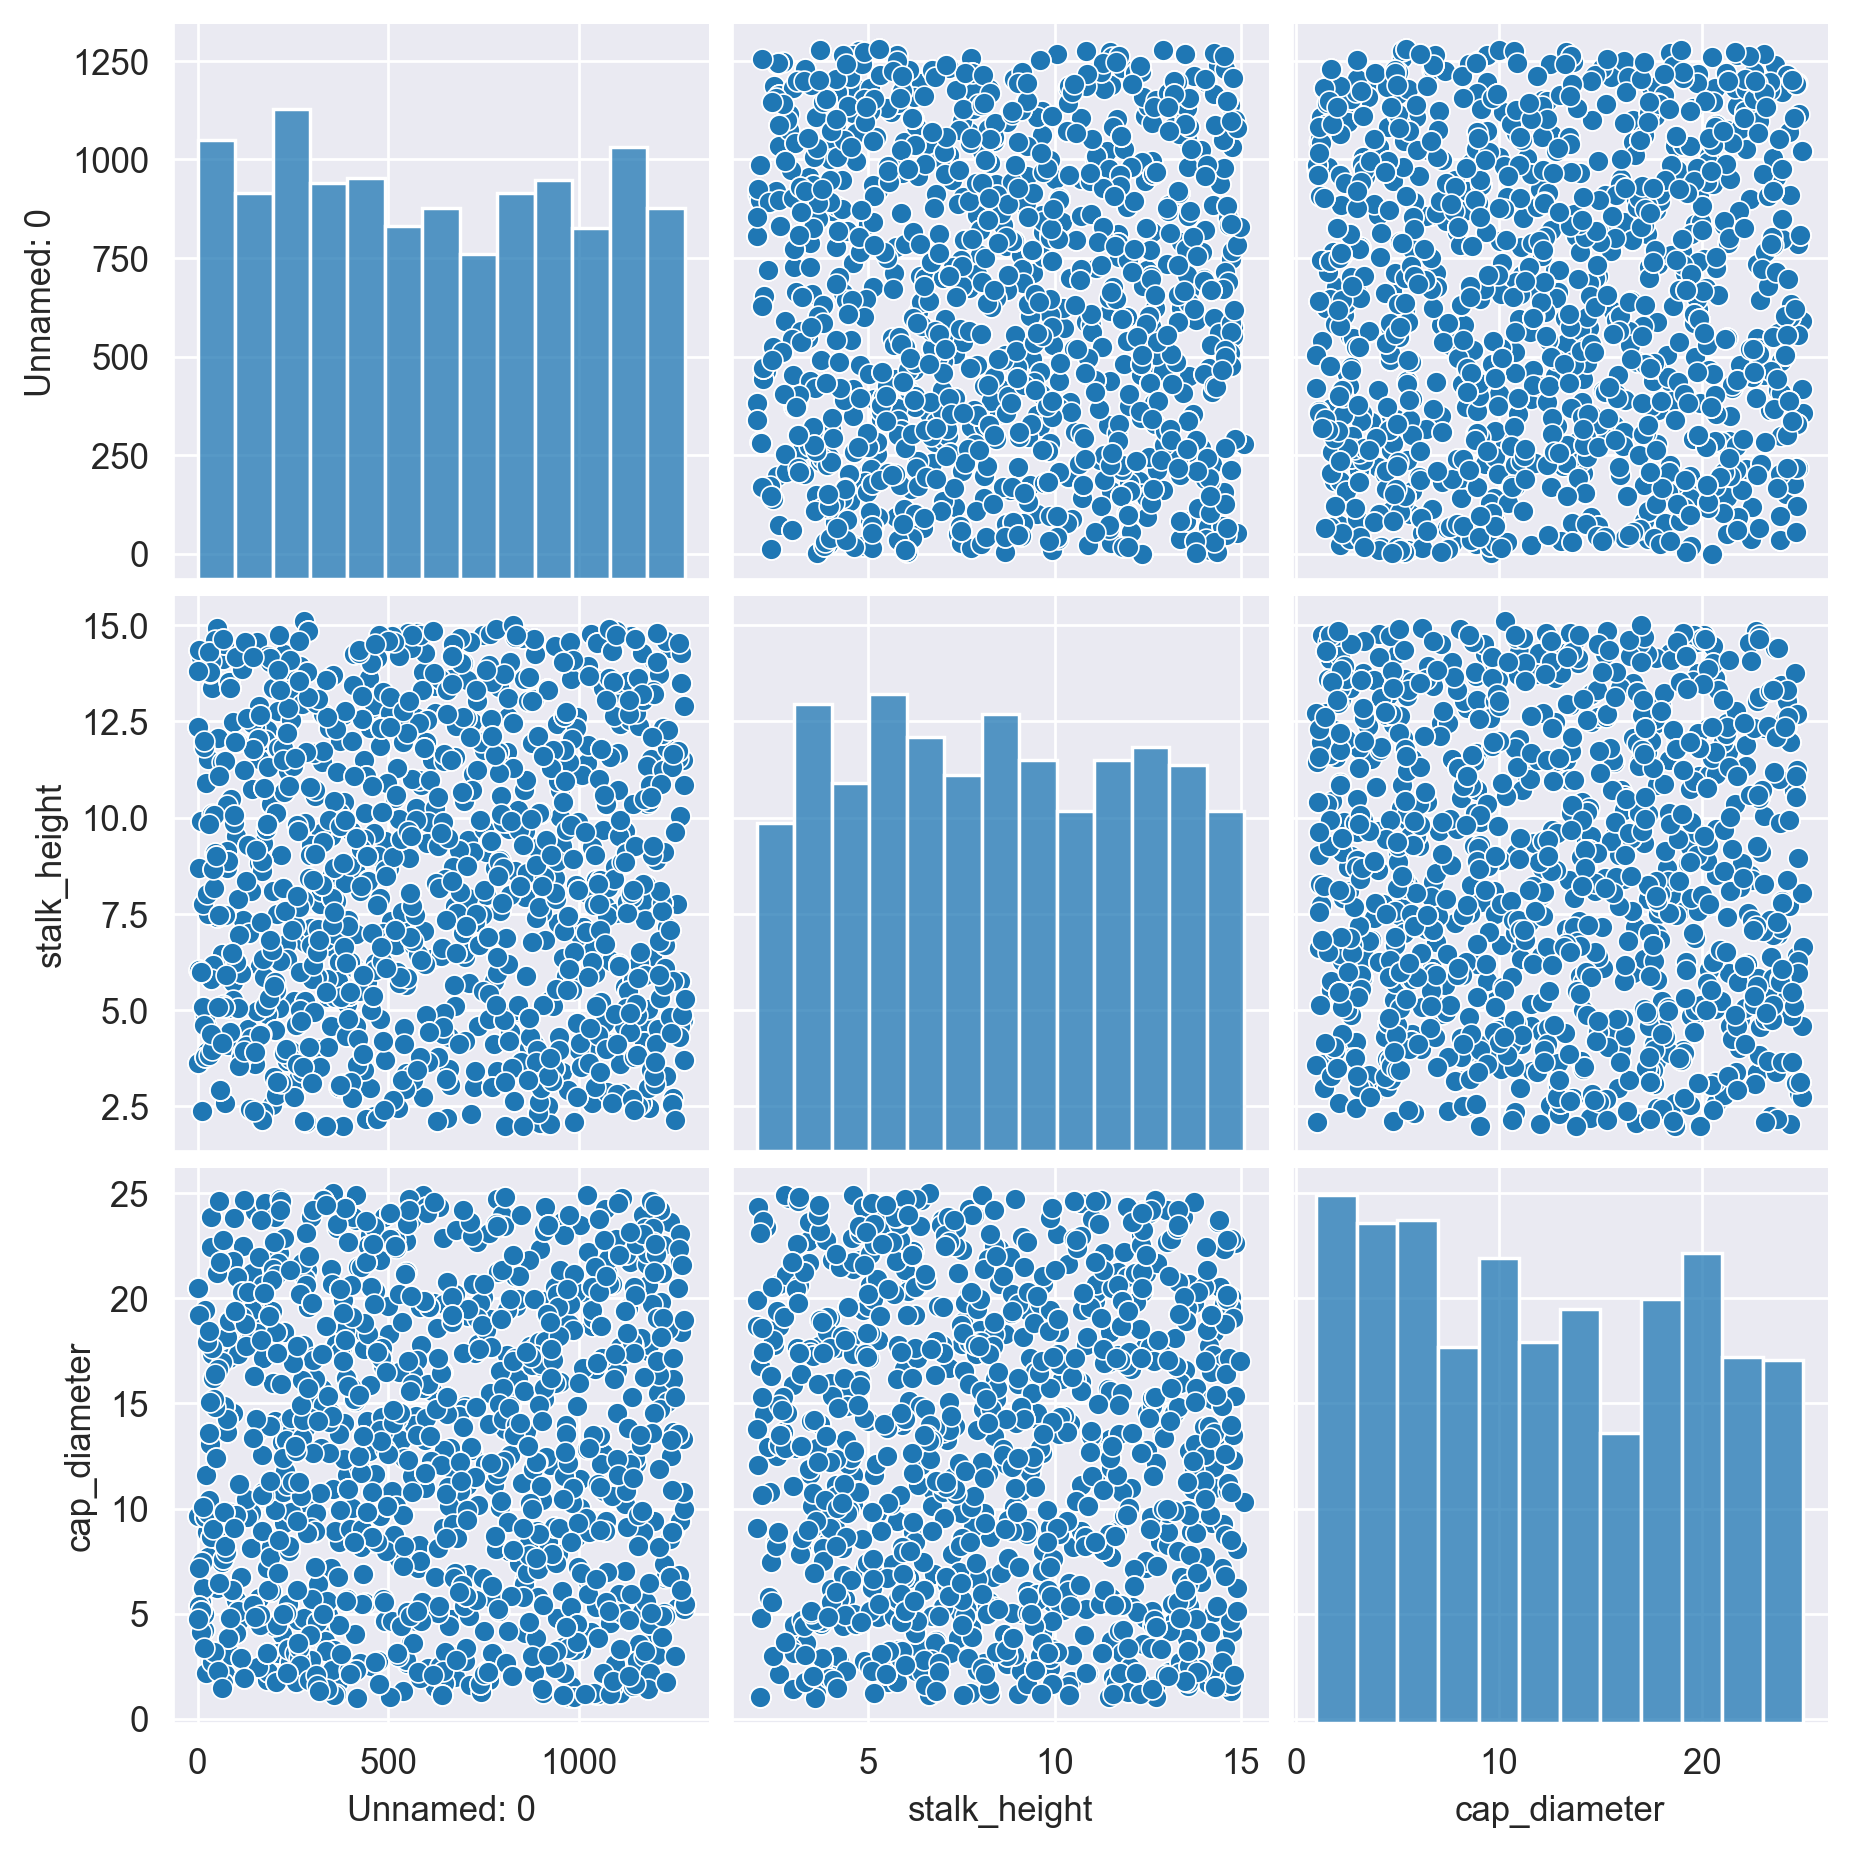

In [29]:
sns.pairplot(df)

In [30]:
#Correlation coefficient

In [57]:
df.corr()

Unnamed: 0  cap_shape  cap_surface  cap_color  \
Unnamed: 0                  1.000000   0.076872    -0.018136   0.024111   
cap_shape                   0.076872   1.000000    -0.003244   0.009615   
cap_surface                -0.018136  -0.003244     1.000000   0.003153   
cap_color                   0.024111   0.009615     0.003153   1.000000   
bruises                    -0.046627  -0.001190    -0.021352   0.016445   
odor                       -0.012730  -0.030119    -0.021926  -0.065410   
gill_attachment            -0.005051   0.015477    -0.010513   0.023835   
gill_spacing                0.048191  -0.048783     0.068918  -0.015628   
gill_size                  -0.022992   0.040497    -0.038490   0.009888   
gill_color                  0.038452   0.032123     0.045561  -0.005898   
stalk_shape                -0.022255   0.011573    -0.024032  -0.020397   
stalk_root                  0.013280   0.057405    -0.008284  -0.004423   
stalk_surface_above_ring   -0.061770  -0.030537     0.016799  -0.019983   
stalk_surface_below_ring   -0.097594  -0.000870    -0.000493   0.000528   
stalk_color_above_ring     -0.019583  -0.021350    -0.048534   0.038920   
stalk_color_below_ring      0.014746   0.027522    -0.011742   0.036951   
veil_type                   0.019658  -0.039029    -0.068705  -0.020039   
veil_color                 -0.048383  -0.017399     0.040341  -0.036166   
ring_number                -0.067070   0.036999     0.005855   0.055593   
ring_type                   0.022166   0.010172     0.017616   0.021509   
spore_print_color          -0.003308   0.024596    -0.042134   0.082155   
population                  0.018726   0.003602    -0.003963  -0.027551   
habitat                     0.051532   0.028388    -0.038661  -0.025568   
class                       0.005902   0.001140    -0.046409  -0.078029   
stalk_height               -0.001508   0.024540     0.043482   0.044086   
cap_diameter                0.051881   0.037743     0.016606  -0.000489   

                           bruises      odor  gill_attachment  gill_spacing  \
Unnamed: 0               -0.046627 -0.012730        -0.005051      0.048191   
cap_shape                -0.001190 -0.030119         0.015477     -0.048783   
cap_surface              -0.021352 -0.021926        -0.010513      0.068918   
cap_color                 0.016445 -0.065410         0.023835     -0.015628   
bruises                   1.000000  0.026274         0.009402     -0.004458   
odor                      0.026274  1.000000        -0.055214     -0.002847   
gill_attachment           0.009402 -0.055214         1.000000     -0.063604   
gill_spacing             -0.004458 -0.002847        -0.063604      1.000000   
gill_size                 0.041851 -0.027313         0.009386     -0.022650   
gill_color               -0.035135 -0.051793         0.035279     -0.010729   
stalk_shape               0.007928  0.009072        -0.018698      0.051041   
stalk_root               -0.014604 -0.005430        -0.013484      0.000668   
stalk_surface_above_ring -0.043735  0.063281        -0.021187     -0.031336   
stalk_surface_below_ring -0.013857  0.005568        -0.009479     -0.043794   
stalk_color_above_ring    0.009374 -0.006393         0.011811     -0.045491   
stalk_color_below_ring   -0.077316 -0.007103         0.007839      0.003012   
veil_type                 0.016775  0.028177        -0.042727     -0.016567   
veil_color               -0.053680  0.015397        -0.023648      0.004960   
ring_number              -0.022588 -0.068819         0.080437      0.024984   
ring_type                -0.028750  0.033956        -0.006025      0.001516   
spore_print_color        -0.026481 -0.057705         0.039356      0.016376   
population                0.012976 -0.011753        -0.002649     -0.004920   
habitat                   0.013392 -0.051237         0.005944      0.004055   
class                    -0.015498  0.039536        -0.028194      0.046505   
stalk_height             

<Axes: >

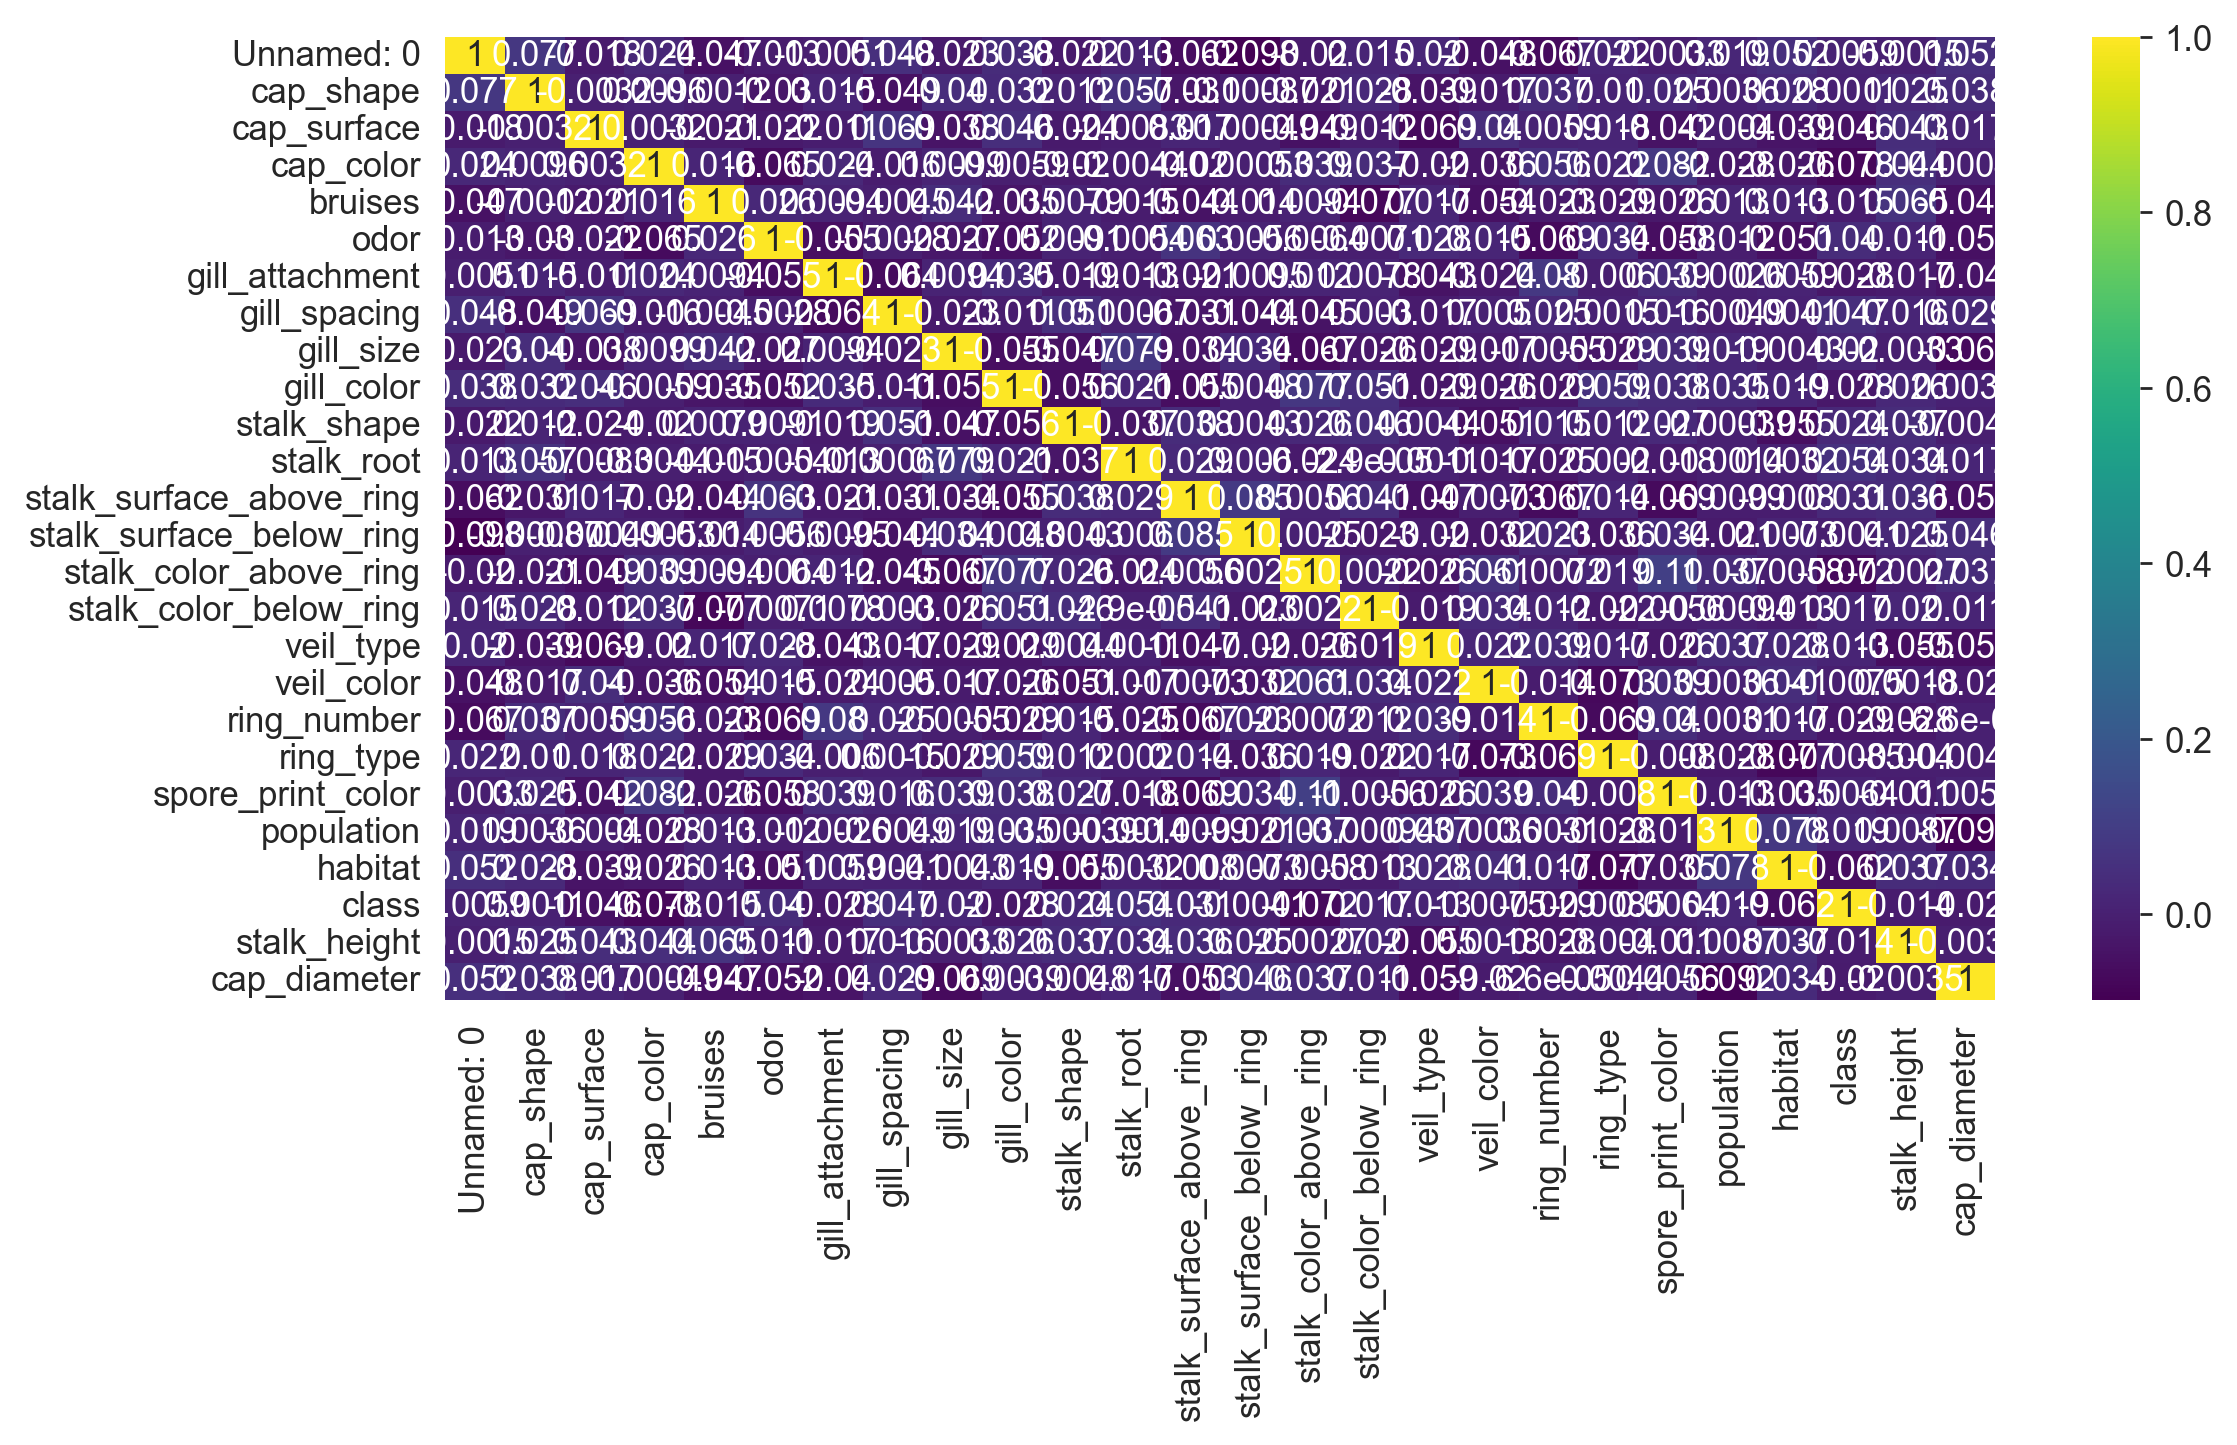

In [58]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')

In [59]:
df.dtypes

Unnamed: 0                    int64
cap_shape                   float64
cap_surface                 float64
cap_color                   float64
bruises                     float64
odor                        float64
gill_attachment             float64
gill_spacing                float64
gill_size                   float64
gill_color                  float64
stalk_shape                 float64
stalk_root                  float64
stalk_surface_above_ring    float64
stalk_surface_below_ring    float64
stalk_color_above_ring      float64
stalk_color_below_ring      float64
veil_type                   float64
veil_color                  float64
ring_number                 float64
ring_type                   float64
spore_print_color           float64
population                  float64
habitat                     float64
class                       float64
stalk_height                float64
cap_diameter                float64
dtype: object

In [33]:
cat_cols = df.select_dtypes(object).columns
cat_cols

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class'],
      dtype='object')

In [34]:
oe = OrdinalEncoder()

df[cat_cols] = oe.fit_transform(df[cat_cols])

In [35]:
df[cat_cols] 

cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
0           4.0          2.0        7.0      0.0   1.0              1.0   
1           4.0          0.0        6.0      0.0   1.0              3.0   
2           3.0          1.0        5.0      1.0   4.0              1.0   
3           0.0          2.0        4.0      1.0   3.0              3.0   
4           3.0          3.0        8.0      1.0   5.0              2.0   
...         ...          ...        ...      ...   ...              ...   
1995        4.0          2.0        0.0      1.0   4.0              0.0   
1996        4.0          2.0        5.0      1.0   5.0              0.0   
1997        2.0          1.0        3.0      1.0   3.0              3.0   
1998        0.0          3.0        7.0      0.0   7.0              2.0   
1999        2.0          2.0        8.0      1.0   7.0              1.0   

      gill_spacing  gill_size  gill_color  stalk_shape  ...  \
0              2.0        0.0         7.0          1.0  ...   
1              1.0        1.0         3.0          0.0  ...   
2              1.0        0.0         8.0          1.0  ...   
3              0.0        0.0         6.0          0.0  ...   
4              1.0        1.0         6.0          0.0  ...   
...            ...        ...         ...          ...  ...   
1995           1.0        1.0         3.0          1.0  ...   
1996           2.0        1.0         9.0          1.0  ...   
1997           0.0        1.0         7.0          1.0  ...   
1998           0.0        1.0         6.0          0.0  ...   
1999           0.0        1.0         8.0          0.0  ...   

      stalk_color_above_ring  stalk_color_below_ring  veil_type  veil_color  \
0                        3.0                     8.0        0.0         0.0   
1                        2.0                     0.0        1.0         0.0   
2                        8.0                     3.0        1.0         3.0   
3                        8.0                     5.0        0.0         3.0   
4                        3.0                     7.0        1.0         2.0   
...                      ...                     ...        ...         ...   
1995                     5.0                     4.0        0.0         1.0   
1996                     5.0                     4.0        0.0         2.0   
1997                     0.0                     6.0        0.0         0.0   
1998                     3.0                     5.0        1.0         3.0   
1999                     3.0                     0.0        0.0         2.0   

      ring_number  ring_type  spore_print_color  population  habitat  class  
0             2.0        6.0                3.0         1.0      5.0    1.0  
1             2.0        6.0                1.0         2.0      5.0    0.0  
2             2.0        6.0                6.0         0.0      5.0    1.0  
3             2.0        0.0                4.0         1.0      0.0    1.0  
4             0.0        4.0                8.0         1.0      4.0    1.0  
...           ...        ...                ...         ...      ...    ...  
1995          1.0        2.0                6.0         0.0      1.0    1.0  
1996          1.0        7.0                8.0         2.0      5.0    1.0  
1997          2.0        1.0                8.0         0.0      6.0    1.0  
1998          1.0        0.0                1.0         5.0      6.0    1.0  
1999          2.0        3.0                7.0         2.0      4.0    1.0  

[2000 rows x 23 columns]

<Axes: xlabel='cap_surface', ylabel='gill_color'>

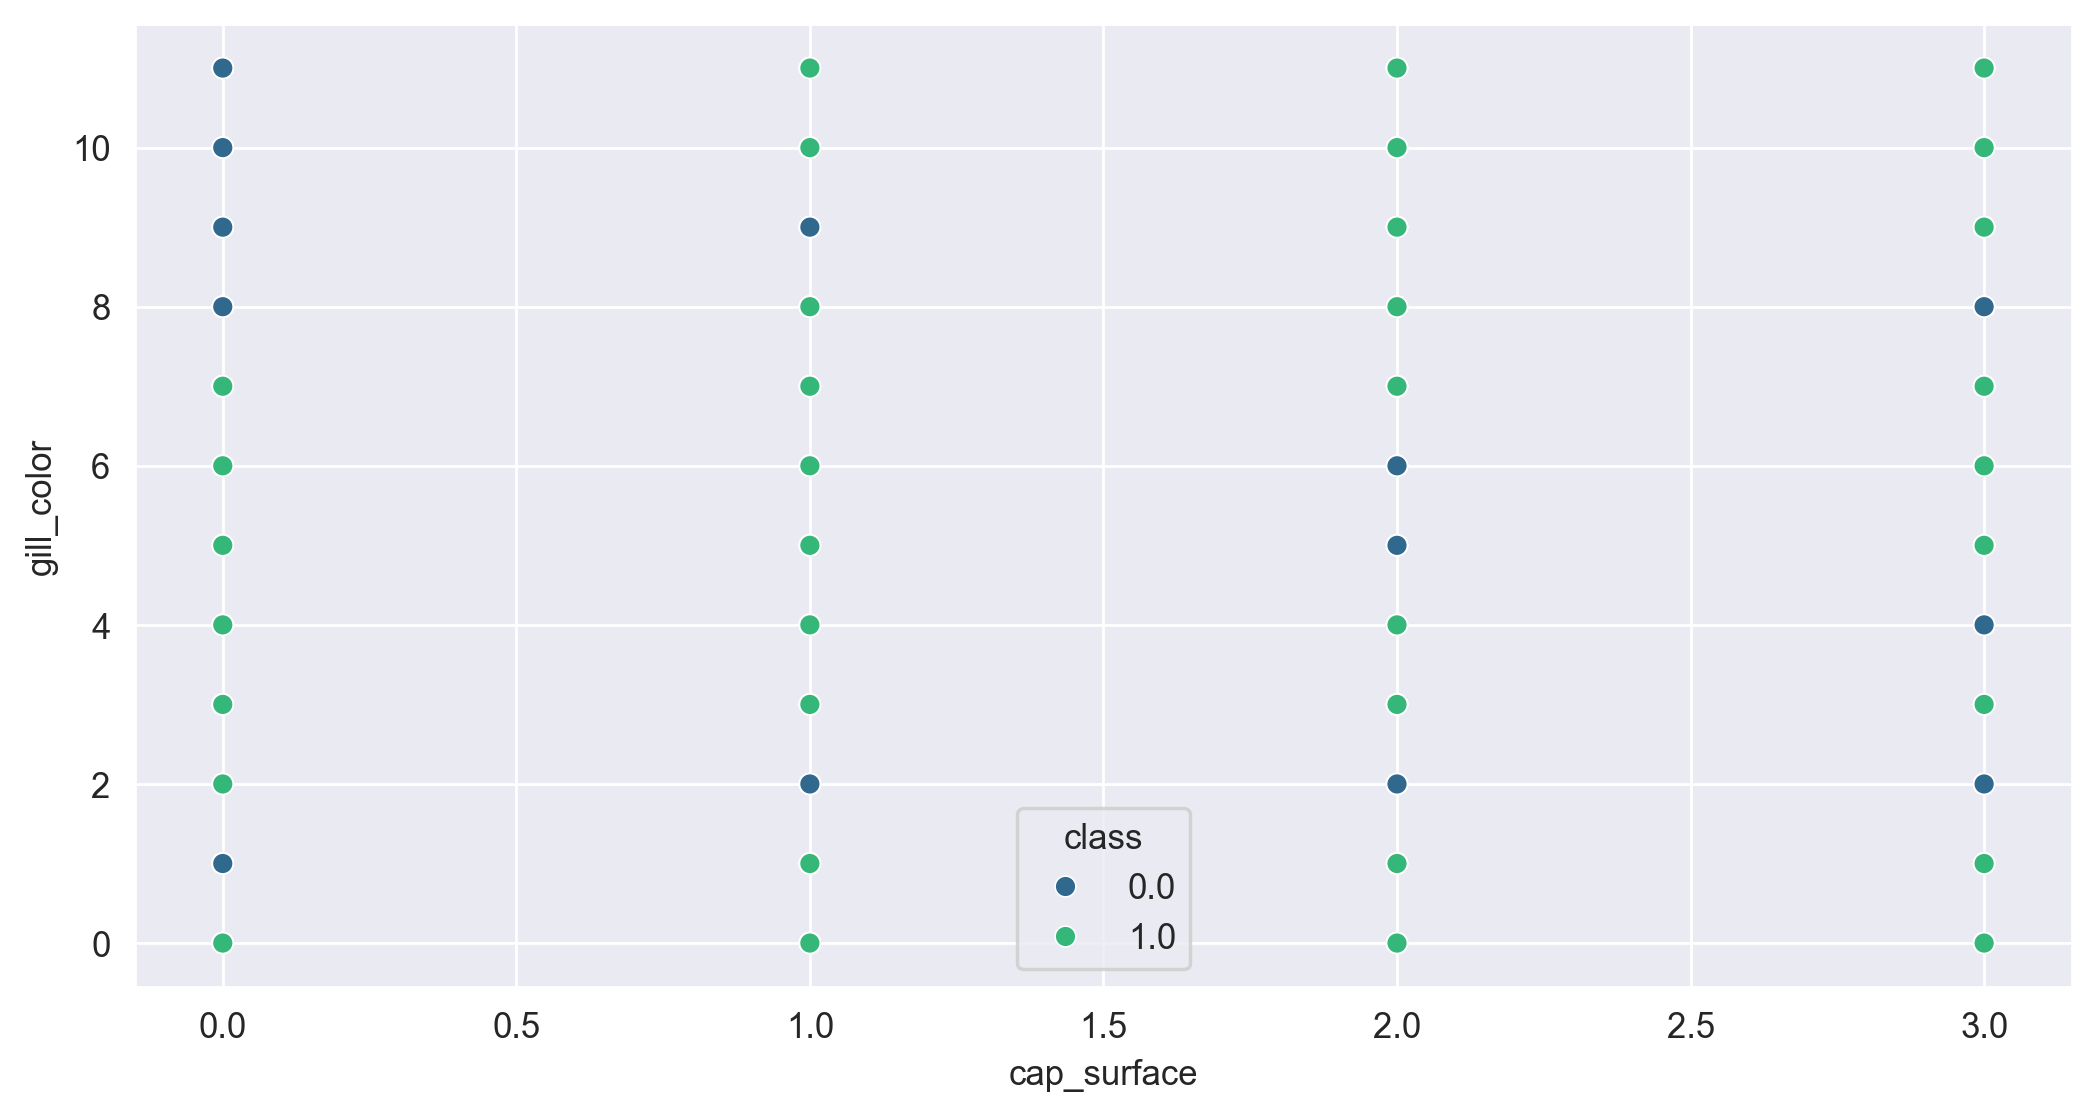

In [36]:
#2D scatterplot to understand the data.
sns.scatterplot(x= df['cap_surface'], y = df['gill_color'], hue=df['class'], palette='viridis')

<Axes: xlabel='cap_shape', ylabel='gill_attachment'>

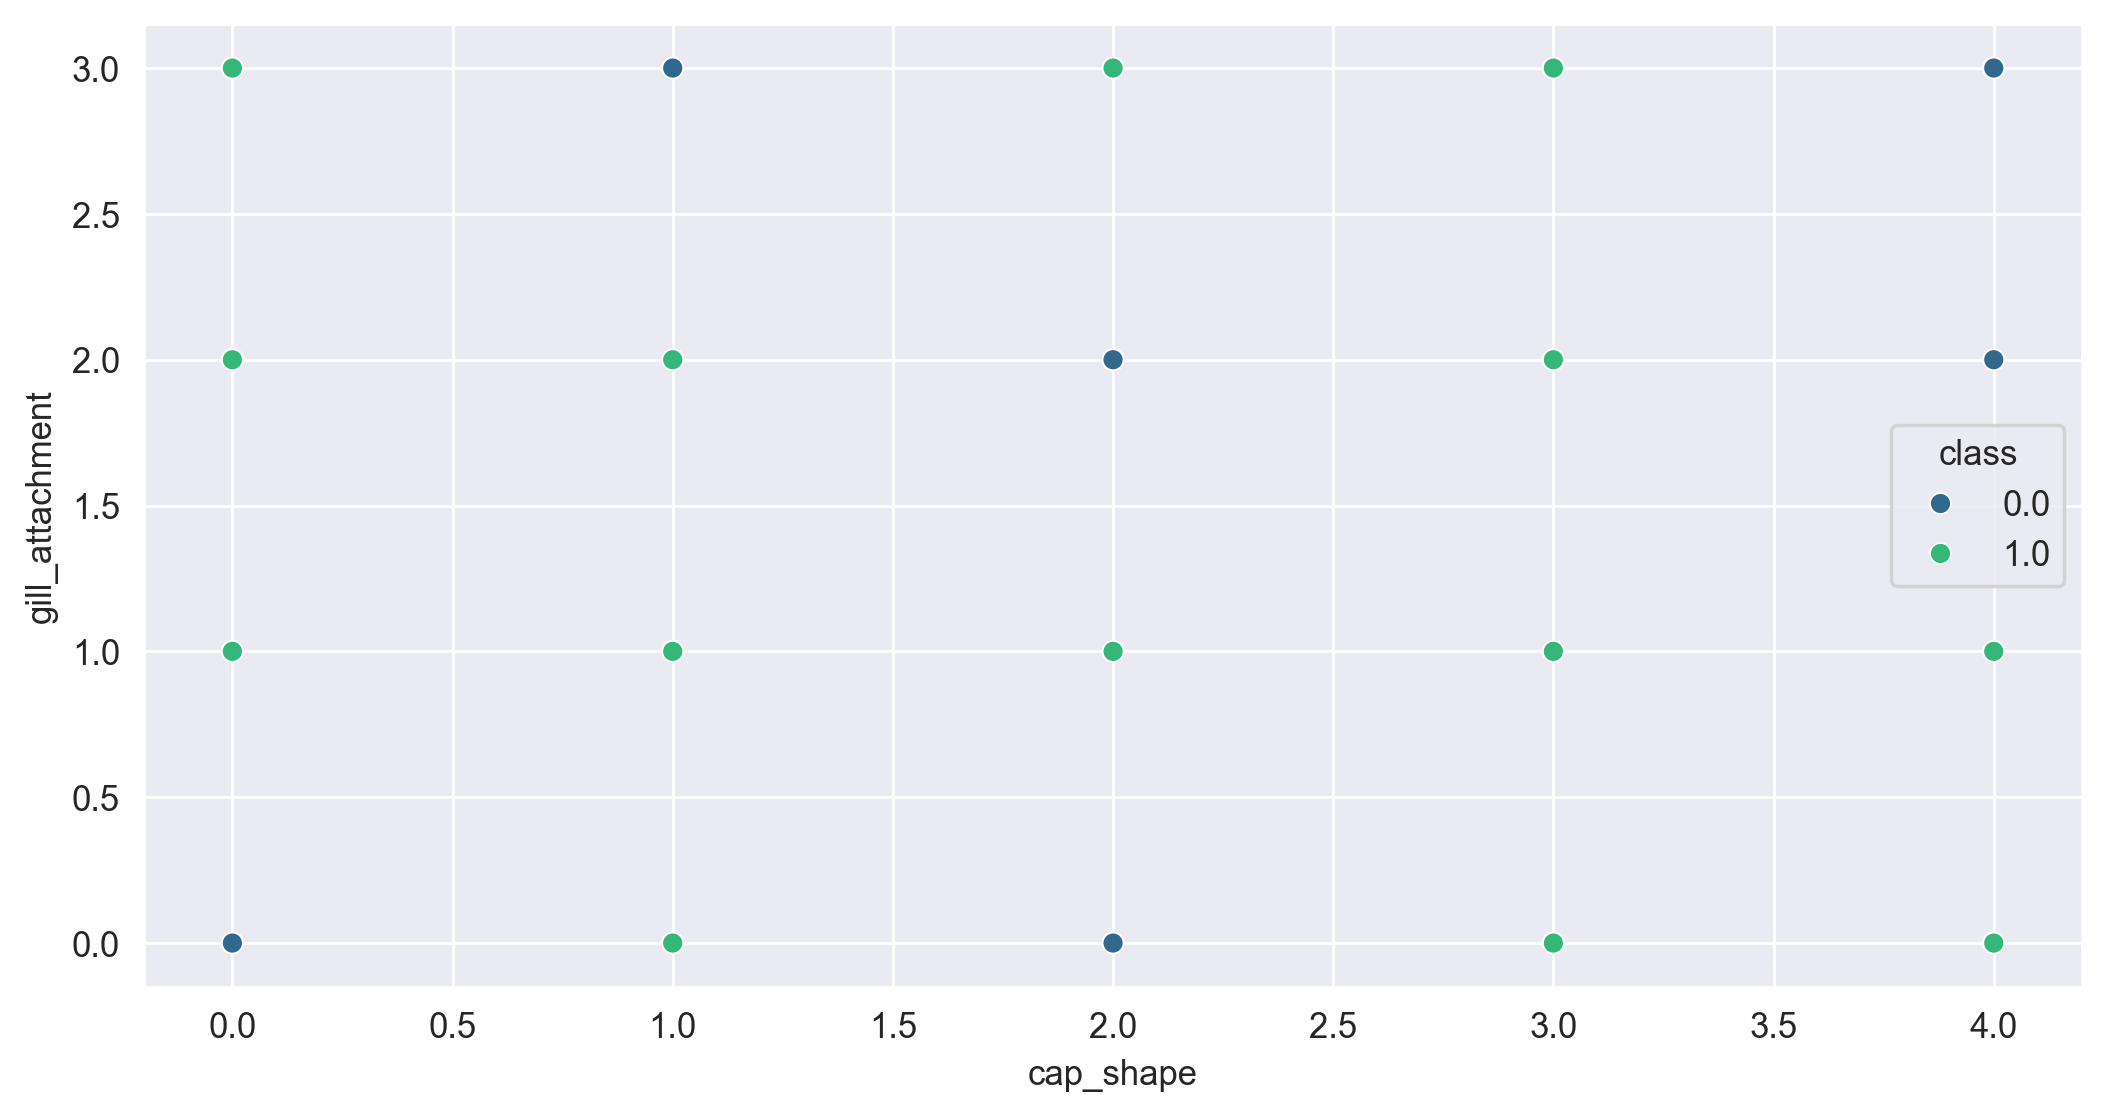

In [37]:
sns.scatterplot(x= df['cap_shape'], y = df['gill_attachment'], hue=df['class'], palette='viridis')

In [38]:
import plotly.express as pe

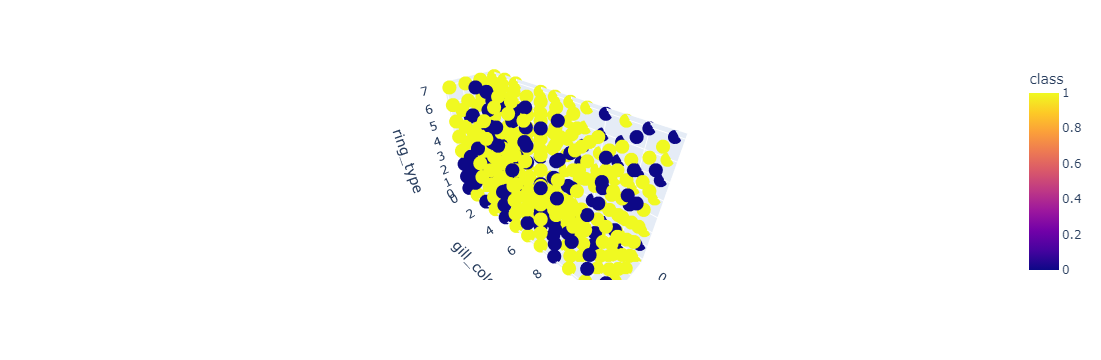

In [39]:
pe.scatter_3d(data_frame=df,x = 'cap_surface',y = 'gill_color',z = 'ring_type', color = 'class')

In [40]:
#model bulding
x = df.iloc[:,:-1]
y=df['class']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=1)
svc = SVC()

svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

0.7025
0.69


In [43]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [44]:
xtrain

Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0           1167        4.0          2.0        7.0      0.0   1.0   
816          371        1.0          0.0        0.0      0.0   4.0   
790          200        1.0          0.0        2.0      0.0   3.0   
361          355        1.0          2.0        5.0      0.0   3.0   
592          978        3.0          0.0        6.0      1.0   4.0   
...          ...        ...          ...        ...      ...   ...   
1791         490        0.0          0.0        7.0      0.0   4.0   
1096         598        0.0          2.0        6.0      1.0   3.0   
1932         808        2.0          1.0        6.0      0.0   7.0   
235          791        2.0          0.0        8.0      1.0   8.0   
1061         659        3.0          1.0        0.0      1.0   6.0   

      gill_attachment  gill_spacing  gill_size  gill_color  ...  \
0                 1.0           2.0        0.0         7.0  ...   
816               3.0           2.0        1.0        11.0  ...   
790               0.0           2.0        0.0         3.0  ...   
361               1.0           0.0        1.0         3.0  ...   
592               2.0           0.0        0.0        11.0  ...   
...               ...           ...        ...         ...  ...   
1791              3.0           0.0        0.0         2.0  ...   
1096              2.0           1.0        1.0        11.0  ...   
1932              3.0           1.0        0.0         2.0  ...   
235               3.0           0.0        0.0         0.0  ...   
1061              1.0           0.0        1.0         3.0  ...   

      stalk_color_below_ring  veil_type  veil_color  ring_number  ring_type  \
0                        8.0        0.0         0.0          2.0        6.0   
816                      2.0        0.0         3.0          1.0        4.0   
790                      7.0        1.0         2.0          2.0        2.0   
361                      3.0        1.0         0.0          1.0        7.0   
592                      1.0        1.0         1.0          1.0        2.0   
...                      ...        ...         ...          ...        ...   
1791                     6.0        0.0         2.0          0.0        2.0   
1096                     4.0        0.0         0.0          2.0        5.0   
1932                     5.0        1.0         0.0          0.0        6.0   
235                      1.0        1.0         2.0          1.0        5.0   
1061                     0.0        1.0         1.0          2.0        0.0   

      spore_print_color  population  habitat  class  stalk_height  
0                   3.0         1.0      5.0    1.0     14.276173  
816                 5.0         4.0      4.0    1.0      6.241350  
790                 2.0         2.0      6.0    1.0      5.622111  
361                 8.0         5.0      3.0    0.0     13.707625  
592                 4.0         2.0      1.0    1.0     14.558263  
...                 ...         ...      ...    ...           ...  
1791                4.0         3.0      1.0    0.0      2.407121  
1096                6.0         3.0      1.0    0.0      6.205787  
1932                4.0         0.0      1.0    0.0      3.140109  
235                 4.0         4.0      4.0    0.0     13.397992  
1061                5.0         3.0      1.0    1.0      3.469332  

[1600 rows x 25 columns]

In [45]:
x

array([[ 1.44540978,  1.35664266,  0.39842442, ...,  0.97916574,
         0.65465367,  1.57645935],
       [ 1.09874141,  1.35664266, -1.39628018, ...,  0.97916574,
        -1.52752523, -1.21646308],
       [-0.84260148,  0.66003539, -0.49892788, ...,  0.97916574,
         0.65465367,  0.16371736],
       ...,
       [-0.95993539, -0.03657188, -0.49892788, ...,  1.4865055 ,
         0.65465367,  1.38218107],
       [-0.57060014, -1.42978643,  1.29577672, ...,  1.4865055 ,
         0.65465367,  0.71519905],
       [ 1.19474188, -0.03657188,  0.39842442, ...,  0.47182598,
         0.65465367,  1.24916951]])

In [46]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=1)
svc = SVC(kernel='poly')

svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

1.0
1.0


In [47]:
#With help of GrideSearchCV -> Kernel
from sklearn.model_selection import GridSearchCV

In [48]:
param = {
    'kernel' : ['linear','rbf','poly','sigmoid']
}

In [49]:
grid = GridSearchCV(SVC(), param_grid= param, verbose=1)

In [50]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=1)

In [51]:
grid.best_params_

{'kernel': 'linear'}

In [52]:
svc = SVC(kernel='linear')

svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

1.0
1.0


In [53]:
svc = SVC(kernel='sigmoid')

svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

1.0
1.0


In [54]:
svc = SVC(kernel='rbf')

svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

1.0
1.0


In [55]:
svc = SVC(kernel='poly')

svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

1.0
1.0


In [56]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       124
         1.0       1.00      1.00      1.00       276

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

